In [173]:
import os
import time
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from scipy.stats import boxcox, skew
import matplotlib.pyplot as plt

from IPython.display import display, HTML
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder , PowerTransformer, MultiLabelBinarizer , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%load_ext autoreload
%autoreload 2

import plotly.io as pio
pio.renderers.default = 'iframe'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
## Local Utils File
from utils.eda import *
from utils.road_tax import *
from utils.kanhon_utils import *
from utils.melissa_imputers import *
from utils.melissa_utils import *
from utils.Bhushan_utils import *
from utils.lta_omv_scraper import *
from utils.models import Regression
from utils.regression_evaluation import *

## Load Dataset

In [181]:
test_df = pd.read_csv(r"./dataset/test.csv")
test_df['model'] = test_df['model'].apply(lambda x:x.replace('(', ''))
test_df['reg_date_dt'] = test_df['reg_date'].apply(lambda x: datetime.strptime(x, "%d-%b-%Y"))
test_df['reg_date_year'] = test_df['reg_date_dt'].apply(lambda x:x.year)
test_df['reg_date_month'] = test_df['reg_date_dt'].apply(lambda x:x.month)

orig_df = pd.read_csv(r"./dataset/train.csv")

# clean model
orig_df['model'] = orig_df['model'].apply(lambda x:x.replace('(', ''))
orig_df['reg_date_dt'] = orig_df['reg_date'].apply(lambda x: datetime.strptime(x, "%d-%b-%Y"))
orig_df['reg_date_year'] = orig_df['reg_date_dt'].apply(lambda x:x.year)
orig_df['reg_date_month'] = orig_df['reg_date_dt'].apply(lambda x:x.month)


## Outlier Removal

In [183]:
generic_outlier(df=orig_df,column_name='curb_weight',min_val=440, max_val=46000)

orig_na 307
 For curb_weight column :: Found 1 outliers


,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,reg_date_dt,reg_date_year,reg_date_month
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,...,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0,2018-03-08,2018,3
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0,2017-12-28,2017,12
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0,2007-09-19,2007,9
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0,2008-12-15,2008,12
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",...,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0,2006-12-22,2006,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1329201,Mercedes-Benz C-Class C180 (COE till 06/2031),mercedes-benz,c180,elegant looking and very well maintained by ow...,2011.0,NaN,14-jul-2011,luxury sedan,"coe car, premium ad car, low mileage car",...,NaN,NaN,uncategorized,inline 4 16 valves rwd engine displacement 179...,new battery new throttle body new recording ca...,NaN,85000.0,2011-07-14,2011,7
24996,1285898,Bentley Bentayga 4.0A V8,bentley,bentayga,"ceo car chauffeur driven, always sheltered par...",2018.0,23-aug-2018,29-apr-2020,suv,"parf car, direct owner sale, rare & exotic",...,NaN,NaN,uncategorized,"4.0 liter twin turbocharged v8 engine, produci...","panoramic roof, 8""touchscreen display, navigat...",NaN,412888.0,2020-04-29,2020,4
24997,1306309,Mercedes-Benz A-Class A180,mercedes-benz,a180,great for short term drive or to renew coe. op...,2014.0,NaN,01-apr-2015,hatchback,"parf car, premium ad car, low mileage car, sgc...",...,NaN,NaN,uncategorized,1.6l inline 4 turbocharged engine with 7 speed...,"dual electric seats with 3 memory settings, di...",NaN,23888.0,2015-04-01,2015,4
24998,1306902,Audi A3 Sportback 1.0A TFSI S-tronic,audi,a3,sporty audi a3 in town with upgraded coil over...,2017.0,NaN,30-jun-2017,hatchback,parf car,...,NaN,NaN,uncategorized,"fuel efficient 3 cylinder turbocharged engine,...","bbs sport rim, audi mmi/bluetooth/audio sound ...",NaN,53300.0,2017-06-30,2017,6


In [184]:
generic_outlier(df=orig_df,column_name='power',min_val=1, max_val=None)

 For power column :: Found 13 outliers


,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,reg_date_dt,reg_date_year,reg_date_month
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,...,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0,2018-03-08,2018,3
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0,2017-12-28,2017,12
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0,2007-09-19,2007,9
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0,2008-12-15,2008,12
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",...,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0,2006-12-22,2006,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1329201,Mercedes-Benz C-Class C180 (COE till 06/2031),mercedes-benz,c180,elegant looking and very well maintained by ow...,2011.0,NaN,14-jul-2011,luxury sedan,"coe car, premium ad car, low mileage car",...,NaN,NaN,uncategorized,inline 4 16 valves rwd engine displacement 179...,new battery new throttle body new recording ca...,NaN,85000.0,2011-07-14,2011,7
24996,1285898,Bentley Bentayga 4.0A V8,bentley,bentayga,"ceo car chauffeur driven, always sheltered par...",2018.0,23-aug-2018,29-apr-2020,suv,"parf car, direct owner sale, rare & exotic",...,NaN,NaN,uncategorized,"4.0 liter twin turbocharged v8 engine, produci...","panoramic roof, 8""touchscreen display, navigat...",NaN,412888.0,2020-04-29,2020,4
24997,1306309,Mercedes-Benz A-Class A180,mercedes-benz,a180,great for short term drive or to renew coe. op...,2014.0,NaN,01-apr-2015,hatchback,"parf car, premium ad car, low mileage car, sgc...",...,NaN,NaN,uncategorized,1.6l inline 4 turbocharged engine with 7 speed...,"dual electric seats with 3 memory settings, di...",NaN,23888.0,2015-04-01,2015,4
24998,1306902,Audi A3 Sportback 1.0A TFSI S-tronic,audi,a3,sporty audi a3 in town with upgraded coil over...,2017.0,NaN,30-jun-2017,hatchback,parf car,...,NaN,NaN,uncategorized,"fuel efficient 3 cylinder turbocharged engine,...","bbs sport rim, audi mmi/bluetooth/audio sound ...",NaN,53300.0,2017-06-30,2017,6


In [162]:
## Sanity Check
train_pkl_dir_path = "./dataset/proc_scraped_new_car_info.pkl"
train_scraped = pd.read_pickle(train_pkl_dir_path)

mapping = {
    "suv": 'SUV',
     'mpv': 'MPV',
    "luxury sedan" : 'Luxury Sedan',
    "mid-sized sedan": "Sedan",
     'sports car' : 'Sports',
     'truck' : 'Commercial',
     'hatchback': 'Hatchback',
     'stationwagon' : 'Stationwagon',
     'bus/mini bus':'Commercial',
     'van':'Commercial',
     'others':'Commercial'
}
# feature = "Engine Capacity"
# feature = "Power"
feature= "Kerb Weight"

ref = train_scraped.groupby(["Vehicle Type"])[feature].agg(["min","max"]).reset_index()
train_ref = orig_df.groupby(["type_of_vehicle"])["curb_weight"].agg(["min","max"]).reset_index()
i=0
for elem in orig_df["type_of_vehicle"].unique():
    _, min_val, max_val = ref[ref["Vehicle Type"] == mapping[elem]].iloc[0]
    _, min_train_val, max_train_val = train_ref[train_ref["type_of_vehicle"] ==elem].iloc[0]
    if (min_train_val < min_val) & (max_train_val > max_val):
        print("min | max :: " ,elem)
        i+=1
    elif (min_train_val < min_val):
        print("min :: " ,elem)     
        i+=1  
    elif max_train_val > max_val:
        print("max :: " ,elem)
        i+=1
i

min | max ::  suv
min | max ::  luxury sedan
max ::  mpv
min | max ::  mid-sized sedan
min | max ::  sports car
max ::  truck
min | max ::  hatchback
min | max ::  stationwagon
max ::  bus/mini bus
min ::  van
min ::  others


11

## Dataset Split

In [ ]:
## Split into train val split
train_df, val_df = train_test_split(orig_df, test_size=0.2, random_state=42, shuffle=True)

## Feature Processing

### Fill missing 'make' info from title

In [33]:
make_df = pd.read_csv(r"./dataset/make.csv")
make_ls = [make.lower() for make in make_df['Make List'].unique()]

In [34]:
make_model_imputer = MakeModelImputer(make_ls)

train_df = make_model_imputer.transform(train_df)
val_df = make_model_imputer.transform(val_df) 
test_df = make_model_imputer.transform(test_df) 

In [35]:
# Generating model make imputer
train_df["model_make"] = train_df.model + "_" + train_df.make
val_df["model_make"] = val_df.model + "_" + val_df.make
test_df["model_make"] = test_df.model + "_" + test_df.make

### COE Age Imputer
Adding new col

In [36]:
## New method
coeAge_impute = CoeAgeImputer()

train_df = coeAge_impute.fit_transform(df=train_df)
val_df = coeAge_impute.fit_transform(val_df)
test_df = coeAge_impute.fit_transform(test_df)
display(f' After imputation : {train_df["coe_age_left"].isna().sum()}')

' After imputation : 0'

### Age Range Proc 
Adding new col

In [37]:
## New method
ageRangeProc_impute = AgeRangeproc_dfer()

train_df = ageRangeProc_impute.fit_transform(df=train_df)
val_df = ageRangeProc_impute.fit_transform(val_df)
test_df = ageRangeProc_impute.fit_transform(test_df)
display(f' After imputation train_df : {train_df["age_range"].isna().sum()}')
display(f' After imputation val_df : {val_df["age_range"].isna().sum()}')
display(f' After imputation test_df : {test_df["age_range"].isna().sum()}')

' After imputation train_df : 0'

' After imputation val_df : 0'

' After imputation test_df : 0'

### Car Age

In [38]:
depreciation_imputer = DepreciationImputer()
train_df = depreciation_imputer.calc_vehicle_age(train_df) # 0 empty records - due to 'manufactured' having 7 empty records
val_df = depreciation_imputer.calc_vehicle_age(val_df) # 0 empty records
test_df = depreciation_imputer.calc_vehicle_age(test_df) # 0 empty records

display(f' After imputation train_df : {train_df["car_age"].isna().sum()}')
display(f' After imputation val_df : {val_df["car_age"].isna().sum()}')
display(f' After imputation test_df : {test_df["car_age"].isna().sum()}')

' After imputation train_df : 0'

' After imputation val_df : 0'

' After imputation test_df : 0'

### Manufactured

In [39]:
# Impute manufactured date
train_df = impute_manufactured_date(train_df) 
val_df = impute_manufactured_date(val_df) 
test_df = impute_manufactured_date(test_df)

### type_of_vehicle

In [40]:
## Processing 
train_df , vehicle_type_encoder = onehot_fit_transform(train_df, "type_of_vehicle")
val_df = onehot_type_fit(val_df, vehicle_type_encoder)
test_df = onehot_type_fit(test_df, vehicle_type_encoder)

### curb_weight

In [41]:
train_pkl_dir_path = "./dataset/proc_scraped_new_car_info.pkl"
test_pkl_dir_path = "./dataset/test_proc_scraped_new_car_info.pkl"
variable = "curb_weight"

sgcarmart_imputer = GenericSGCarMartImputer(
    train_pickle_dir=train_pkl_dir_path, test_pickle_dir=test_pkl_dir_path)

display(f' train_df Before imputation {variable} : {train_df[variable].isna().sum()}')
display(f' val_df Before imputation : {val_df[variable].isna().sum()}')
display(f' test_df Before imputation : {test_df[variable].isna().sum()}')

train_df.loc[:,variable] = sgcarmart_imputer.impute_val(df=train_df,variable=variable,df_type="train")
val_df.loc[:,variable]  = sgcarmart_imputer.impute_val(df=val_df,variable=variable,df_type="train")
test_df.loc[:,variable]  = sgcarmart_imputer.impute_val(df=test_df,variable=variable,df_type="test")

display(f' train_df After imputation : {train_df[variable].isna().sum()}')
display(f' val_df After imputation : {val_df[variable].isna().sum()}')
display(f' test_df After imputation : {test_df[variable].isna().sum()}')

' train_df Before imputation curb_weight : 241'

' val_df Before imputation : 66'

' test_df Before imputation : 110'

' train_df After imputation : 228'

' val_df After imputation : 64'

' test_df After imputation : 106'

In [42]:
curb_weight_impute = ModelMakeImputer(column_a="model_make", column_b="curb_weight")
display(f' train_df Before imputation {variable} : {train_df[variable].isna().sum()}')
display(f' val_df Before imputation : {val_df[variable].isna().sum()}')
display(f' test_df Before imputation : {test_df[variable].isna().sum()}')

train_df = curb_weight_impute.fit_transform(train_df) # 82 rows missing
val_df = curb_weight_impute.transform(val_df) # 20 rows missing
test_df = curb_weight_impute.transform(test_df) # 40 rows missing

display(f' train_df After imputation : {train_df[variable].isna().sum()}')
display(f' val_df After imputation : {val_df[variable].isna().sum()}')
display(f' test_df After imputation : {test_df[variable].isna().sum()}')

' train_df Before imputation curb_weight : 228'

' val_df Before imputation : 64'

' test_df Before imputation : 106'

' train_df After imputation : 78'

' val_df After imputation : 19'

' test_df After imputation : 39'

In [43]:
# Many rows are missing, impute using median values
# imputer = SimpleImputer(strategy='median')
# train_df['curb_weight'] = imputer.fit_transform(train_df[['curb_weight']])
# val_df['curb_weight'] = imputer.transform(val_df[['curb_weight']])
# test_df['curb_weight'] = imputer.transform(test_df[['curb_weight']])

### power 

In [44]:
train_pkl_dir_path = "./dataset/proc_scraped_new_car_info.pkl"
test_pkl_dir_path = "./dataset/test_proc_scraped_new_car_info.pkl"
variable = "power"

display(f' train_df Before imputation {variable}: {train_df[variable].isna().sum()}')
display(f' val_df Before imputation : {val_df[variable].isna().sum()}')
display(f' test_df Before imputation : {test_df[variable].isna().sum()}')

train_df.loc[:,variable] = sgcarmart_imputer.impute_val(df=train_df,variable=variable,df_type="train")
val_df.loc[:,variable]  = sgcarmart_imputer.impute_val(df=val_df,variable=variable,df_type="train")
test_df.loc[:,variable]  = sgcarmart_imputer.impute_val(df=test_df,variable=variable,df_type="test")

display(f' train_df After imputation : {train_df[variable].isna().sum()}')
display(f' val_df After imputation : {val_df[variable].isna().sum()}')
display(f' test_df After imputation : {test_df[variable].isna().sum()}')

' train_df Before imputation power: 2109'

' val_df Before imputation : 531'

' test_df Before imputation : 1086'

' train_df After imputation : 1451'

' val_df After imputation : 368'

' test_df After imputation : 714'

In [45]:
power_impute = ModelMakeImputer(column_a="model_make", column_b="power")

display(f' train_df Before imputation {variable}: {train_df[variable].isna().sum()}')
display(f' val_df Before imputation : {val_df[variable].isna().sum()}')
display(f' test_df Before imputation : {test_df[variable].isna().sum()}')
train_df = power_impute.fit_transform(train_df) # 1537 rows missing
val_df = power_impute.transform(val_df) # 379 rows missing
test_df = power_impute.transform(test_df) # 789 rows missing
display(f' train_df After imputation : {train_df[variable].isna().sum()}')
display(f' val_df After imputation : {val_df[variable].isna().sum()}')
display(f' test_df After imputation : {test_df[variable].isna().sum()}')

' train_df Before imputation power: 1451'

' val_df Before imputation : 368'

' test_df Before imputation : 714'

' train_df After imputation : 433'

' val_df After imputation : 114'

' test_df After imputation : 231'

In [46]:
# # Many rows are missing, impute using median values
# imputer = SimpleImputer(strategy='median')
# train_df['power'] = imputer.fit_transform(train_df[['power']])
# val_df['power'] = imputer.transform(val_df[['power']])
# test_df['power'] = imputer.transform(test_df[['power']])

### engine_cap 

In [47]:
train_pkl_dir_path = "./dataset/proc_scraped_new_car_info.pkl"
test_pkl_dir_path = "./dataset/test_proc_scraped_new_car_info.pkl"
variable = "engine_cap"

display(f' train_df Before imputation {variable} : {train_df[variable].isna().sum()}')
display(f' val_df Before imputation : {val_df[variable].isna().sum()}')
display(f' test_df Before imputation : {test_df[variable].isna().sum()}')

train_df.loc[:,variable] = sgcarmart_imputer.impute_val(df=train_df,variable=variable,df_type="train")
val_df.loc[:,variable]  = sgcarmart_imputer.impute_val(df=val_df,variable=variable,df_type="train")
test_df.loc[:,variable]  = sgcarmart_imputer.impute_val(df=test_df,variable=variable,df_type="test")

display(f' train_df After imputation : {train_df[variable].isna().sum()}')
display(f' val_df After imputation : {val_df[variable].isna().sum()}')
display(f' test_df After imputation : {test_df[variable].isna().sum()}')

' train_df Before imputation engine_cap : 475'

' val_df Before imputation : 121'

' test_df Before imputation : 235'

' train_df After imputation : 475'

' val_df After imputation : 121'

' test_df After imputation : 235'

In [48]:
engine_impute = ModelMakeImputer(column_a="model_make", column_b="engine_cap")

display(f' train_df Before imputation {variable} : {train_df[variable].isna().sum()}')
display(f' val_df Before imputation : {val_df[variable].isna().sum()}')
display(f' test_df Before imputation : {test_df[variable].isna().sum()}')

train_df = engine_impute.fit_transform(train_df) # 384 rows missing
val_df = engine_impute.transform(val_df) # 97 rows missing
test_df = engine_impute.transform(test_df) # 186 rows missing

display(f' train_df After imputation : {train_df[variable].isna().sum()}')
display(f' val_df After imputation : {val_df[variable].isna().sum()}')
display(f' test_df After imputation : {test_df[variable].isna().sum()}')

' train_df Before imputation engine_cap : 475'

' val_df Before imputation : 121'

' test_df Before imputation : 235'

' train_df After imputation : 384'

' val_df After imputation : 97'

' test_df After imputation : 186'

In [49]:
# # Many rows are missing, impute using median values
# imputer = SimpleImputer(strategy='median')
# train_df['engine_cap'] = imputer.fit_transform(train_df[['engine_cap']])
# val_df['engine_cap'] = imputer.transform(val_df[['engine_cap']])
# test_df['engine_cap'] = imputer.transform(test_df[['engine_cap']])

### no_of_owners

In [50]:
## New method
display(f' Before imputation : {train_df["no_of_owners"].isna().sum()}')

owner_impute = OwnerImputer()

train_df = owner_impute.fit_transform(df=train_df)
val_df = owner_impute.transform(val_df)
test_df = owner_impute.transform(test_df)
display(f' After imputation : {train_df["no_of_owners"].isna().sum()}')

' Before imputation : 11'

19989
[Number of months per owner]  ->  [mean = 49.10992045625093, median = 41.666666666666664, mode = 29.0]


' After imputation : 0'

### depreciation 

In [51]:
# Imputation using make, model and car age - Dependency on 'car_age'
display(f' Before imputation : {train_df["depreciation"].isna().sum()}')

depreciation_imputer = DepreciationImputer()
train_df = depreciation_imputer.fit_transform(train_df) # 96 empty records
val_df = depreciation_imputer.transform(val_df) # 9 empty records
test_df = depreciation_imputer.transform(test_df) # 9 empty records

# # Median imputation for remaining records
# imputer = SimpleImputer(strategy='median')
# train_df['depreciation'] = imputer.fit_transform(train_df[['depreciation']])
# val_df['depreciation'] = imputer.transform(val_df[['depreciation']])
# test_df['depreciation'] = imputer.transform(test_df[['depreciation']])
# display(f' After imputation : {train_df["depreciation"].isna().sum()}')

' Before imputation : 400'

### Transmission

In [52]:
# Transmission

# One-hot (Binary) encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
train_df['transmission'] = encoder.fit_transform(train_df[['transmission']])
val_df['transmission'] = encoder.transform(val_df[['transmission']])
test_df['transmission'] = encoder.transform(test_df[['transmission']])

### mileage   

display(f' Before imputation : {train_df["mileage"].isna().sum()}')

**New method**

mileage_impute = mileageImputer()

train_df = mileage_impute.fit_transform(df=train_df)
val_df = mileage_impute.transform(val_df)
test_df = mileage_impute.transform(test_df)

display(f' After imputation : {train_df["mileage"].isna().sum()}')

In [53]:
display(f' Before imputation : {train_df["mileage"].isna().sum()}')
## New method

mileage_impute = mileageImputerByType()

train_df = mileage_impute.fit_transform(df=train_df)
val_df = mileage_impute.transform(val_df)
test_df = mileage_impute.transform(test_df)

display(f' After imputation : {train_df["mileage"].isna().sum()}')

' Before imputation : 4248'

[truck] Miles per month -> Mean: 1242.742344383137, Median: 1203.2085561497327, Mode: 1333.3333333333333
[hatchback] Miles per month -> Mean: 1006.5215831417896, Median: 975.3488372093024, Mode: 1000.0
[mpv] Miles per month -> Mean: 1073.4920093529756, Median: 1043.0571004820172, Mode: 1000.0
[mid-sized sedan] Miles per month -> Mean: 1026.9308040735339, Median: 986.0157967032967, Mode: 1000.0
[sports car] Miles per month -> Mean: 670.7384825609863, Median: 678.6335403726708, Mode: 1000.0
[luxury sedan] Miles per month -> Mean: 1012.465942419823, Median: 983.3930222782682, Mode: 1000.0
[suv] Miles per month -> Mean: 1038.3494371542276, Median: 1011.9047619047619, Mode: 1000.0
[stationwagon] Miles per month -> Mean: 1054.6408446444134, Median: 1033.3333333333333, Mode: 615.3846153846154
[van] Miles per month -> Mean: 1140.9854559521784, Median: 1157.0269832703725, Mode: 0.07692307692307693
[bus/mini bus] Miles per month -> Mean: 1307.551701516869, Median: 1223.888888888889, Mode: 2.6666

' After imputation : 0'

### omv 

In [54]:
csv_filename = r'./dataset/lta_omv_data.csv'

if os.path.exists(csv_filename):
    df_lta_car_data = pd.read_csv(csv_filename)
else:
    result_ls = get_lta_omv_data(2002, 2025)
    df_lta_car_data = preprocess_lta_omv_data(result_ls)
    df_lta_car_data.to_csv(csv_filename)

lta_data_imputer = LTADataImputer(df_lta_car_data)

train_df = lta_data_imputer.transform(train_df) # before transform: 49 rows missing, after transform: 24 rows missing
val_df = lta_data_imputer.transform(val_df) # before transform: 15 rows missing, after transform: 9 rows missing
test_df = lta_data_imputer.transform(test_df) 

# imputer = SimpleImputer(strategy='median')
# train_df['omv'] = imputer.fit_transform(train_df[['omv']])
# val_df['omv'] = imputer.transform(val_df[['omv']])
# test_df['omv'] = imputer.transform(test_df[['omv']])

### COE (Outlier Removal)

In [55]:
# COE

# Cap Outliers - Dependency on 'engine_cap' and 'type_of_vehicle'
train_df = cap_coe_outliers(train_df)
val_df = cap_coe_outliers(val_df)
test_df = cap_coe_outliers(test_df)

### Fuel Type (To be edited)

In [56]:
train_df = get_fuel_type(train_df)
val_df = get_fuel_type(val_df)
test_df = get_fuel_type(test_df)

Original Imputation Nan 15339
After Imputation Nan 14397
Original Imputation Nan 3782
After Imputation Nan 3559
Original Imputation Nan 7650
After Imputation Nan 7192


In [57]:
train_pkl_dir_path = "./dataset/proc_scraped_new_car_info.pkl"
test_pkl_dir_path = "./dataset/test_proc_scraped_new_car_info.pkl"
variable = "fuel_type"

display(f' train_df Before imputation {variable} : {train_df[variable].isna().sum()}')
display(f' val_df Before imputation : {val_df[variable].isna().sum()}')
display(f' test_df Before imputation : {test_df[variable].isna().sum()}')

train_df.loc[:,variable] = sgcarmart_imputer.impute_val(df=train_df,variable=variable,df_type="train")
val_df.loc[:,variable]  = sgcarmart_imputer.impute_val(df=val_df,variable=variable,df_type="train")
test_df.loc[:,variable]  = sgcarmart_imputer.impute_val(df=test_df,variable=variable,df_type="test")

display(f' train_df After imputation : {train_df[variable].isna().sum()}')
display(f' val_df After imputation : {val_df[variable].isna().sum()}')
display(f' test_df After imputation : {test_df[variable].isna().sum()}')

' train_df Before imputation fuel_type : 14397'

' val_df Before imputation : 3559'

' test_df Before imputation : 7192'

' train_df After imputation : 5450'

' val_df After imputation : 1335'

' test_df After imputation : 2616'

In [37]:
## Label Encoder
features = ['type_of_vehicle_bus/mini bus',
       'type_of_vehicle_hatchback', 'type_of_vehicle_luxury sedan',
       'type_of_vehicle_mid-sized sedan', 'type_of_vehicle_mpv',
       'type_of_vehicle_others', 'type_of_vehicle_sports car',
       'type_of_vehicle_stationwagon', 'type_of_vehicle_suv',
       'type_of_vehicle_truck', 'type_of_vehicle_van', 'power','engine_cap','fuel_type_diesel',
       'fuel_type_diesel-electric', 'fuel_type_electric', 'fuel_type_petrol',
       'fuel_type_petrol-electric', 'fuel_type_nan']

variable = "fuel_type"
train_df , fuel_type_encoder = onehot_fit_transform(train_df, column_name=variable)
val_df = onehot_type_fit(val_df, fuel_type_encoder, column_name=variable)
test_df = onehot_type_fit(test_df, fuel_type_encoder, column_name=variable)

# # Step 2: Use KNNImputer on the One-Hot Encoded Data
# imputer = KNNImputer(n_neighbors=3)
# imputed_data = imputer.fit_transform(train_df[features])
# imputed_data_val = imputer.fit(val_df[features])
# imputed_data_test = imputer.fit(test_df[features])

# train_imputed_df = pd.DataFrame(imputed_data, columns=features)
# val_imputed_df = pd.DataFrame(imputed_data_val, columns=features)
# test_imputed_df = pd.DataFrame(imputed_data_test, columns=features)

# # Reverse the one-hot encoding
# reversed_data_train = encoder.inverse_transform(train_imputed_df)
# reversed_data_val  = encoder.inverse_transform(val_imputed_df)
# reversed_data_test = encoder.inverse_transform(test_imputed_df)

# # Convert back to original DataFrame format
# train_df = pd.DataFrame(reversed_data_train, columns=data.columns)
# val_df = pd.DataFrame(reversed_data_val, columns=data.columns)
# test_df = pd.DataFrame(reversed_data_test, columns=data.columns)

In [89]:
timputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(train_df[features])
imputed_data_val = imputer.fit(val_df[features])
imputed_data_test = imputer.fit(test_df[features])

In [90]:
train_df[features].iloc[0]


type_of_vehicle_bus/mini bus          0.0
type_of_vehicle_hatchback             0.0
type_of_vehicle_luxury sedan          0.0
type_of_vehicle_mid-sized sedan       0.0
type_of_vehicle_mpv                   0.0
type_of_vehicle_others                0.0
type_of_vehicle_sports car            0.0
type_of_vehicle_stationwagon          0.0
type_of_vehicle_suv                   0.0
type_of_vehicle_truck                 1.0
type_of_vehicle_van                   0.0
power                               110.0
engine_cap                         2999.0
fuel_type_diesel                      1.0
fuel_type_diesel-electric             0.0
fuel_type_electric                    0.0
fuel_type_petrol                      0.0
fuel_type_petrol-electric             0.0
fuel_type_nan                         0.0
Name: 0, dtype: float64

In [96]:
imputed_data.shape

(20000, 19)

In [97]:
train_imputed_df = pd.DataFrame(imputed_data, columns=features)
val_imputed_df = pd.DataFrame(imputed_data_val, columns=features)
test_imputed_df = pd.DataFrame(imputed_data_test, columns=features)

ValueError: DataFrame constructor not properly called!

In [95]:
encoder.get_feature_names_out()

array(['transmission_manual'], dtype=object)

### Cylinder Count

In [58]:
cylinder_count_extractor = CylinderExtractor()

train_df = cylinder_count_extractor.transform(train_df)
val_df = cylinder_count_extractor.transform(val_df) 
test_df = cylinder_count_extractor.transform(test_df) 

In [59]:
cylinder_imputer = CylinderImputer()
train_df = cylinder_imputer.fit_transform(train_df) # 1479 rows missing
val_df = cylinder_imputer.transform(val_df) # 334 rows missing
test_df = cylinder_imputer.transform(test_df)

# # Many rows are missing, impute using median values
# imputer = SimpleImputer(strategy='median')
# train_df['cylinder_cnt'] = imputer.fit_transform(train_df[['cylinder_cnt']])
# val_df['cylinder_cnt'] = imputer.transform(val_df[['cylinder_cnt']])
# test_df['cylinder_cnt'] = imputer.transform(test_df[['cylinder_cnt']])

### Category Parser

In [60]:
category_parser = CategoryParser()
train_df = category_parser.fit_transform(train_df) 
val_df = category_parser.transform(val_df) 
test_df = category_parser.transform(test_df) 

### CO2 Emission Data

In [61]:
train_csv_dir_path = "./dataset/train_data_scrapped_co2_emission.csv"
test_csv_dir_path = "./dataset/test_data_scrapped_co2_emission.csv"
emission_imputer = EmissionImputer(train_csv_dir=train_csv_dir_path, test_csv_dir=test_csv_dir_path)

train_df = emission_imputer.impute_values(df=train_df,df_type="train")
val_df = emission_imputer.impute_values(df=val_df,df_type="train")
test_df = emission_imputer.impute_values(df=test_df,df_type="test")

In [62]:
# # Many rows are missing, impute using median values
# imputer = SimpleImputer(strategy='median')
# train_df['emission_data'] = imputer.fit_transform(train_df[['emission_data']])
# val_df['emission_data'] = imputer.transform(val_df[['emission_data']])
# test_df['emission_data'] = imputer.transform(test_df[['emission_data']])

## KNN ALL

In [67]:
impute_type = "KNN"
impute_strategy = "median" # mean, median, most_frequent, constant, Callable 
impute_neighbours = 5
random_state = 0
impute_max_iter= 10


impute_choice = {
    "simple" : SimpleImputer(strategy=impute_strategy),
    "KNN" : KNNImputer(n_neighbors=impute_neighbours)
}

imputer = impute_choice[impute_type]
cols = retun_numeric_cols(train_df.drop(columns=["indicative_price","price"]))

train_df[cols] = imputer.fit_transform(train_df[cols])
val_df[cols] = imputer.transform(val_df[cols])
test_df[cols] = imputer.transform(test_df[cols])

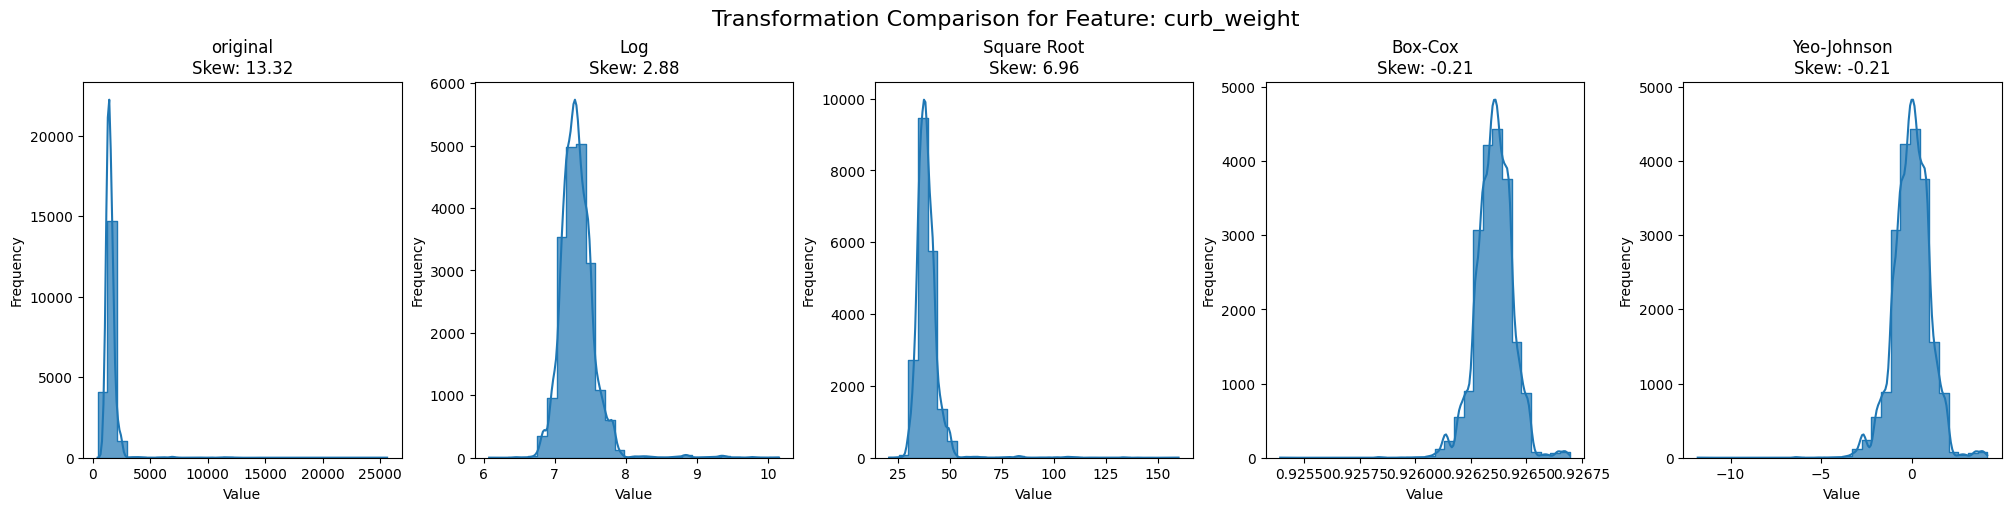

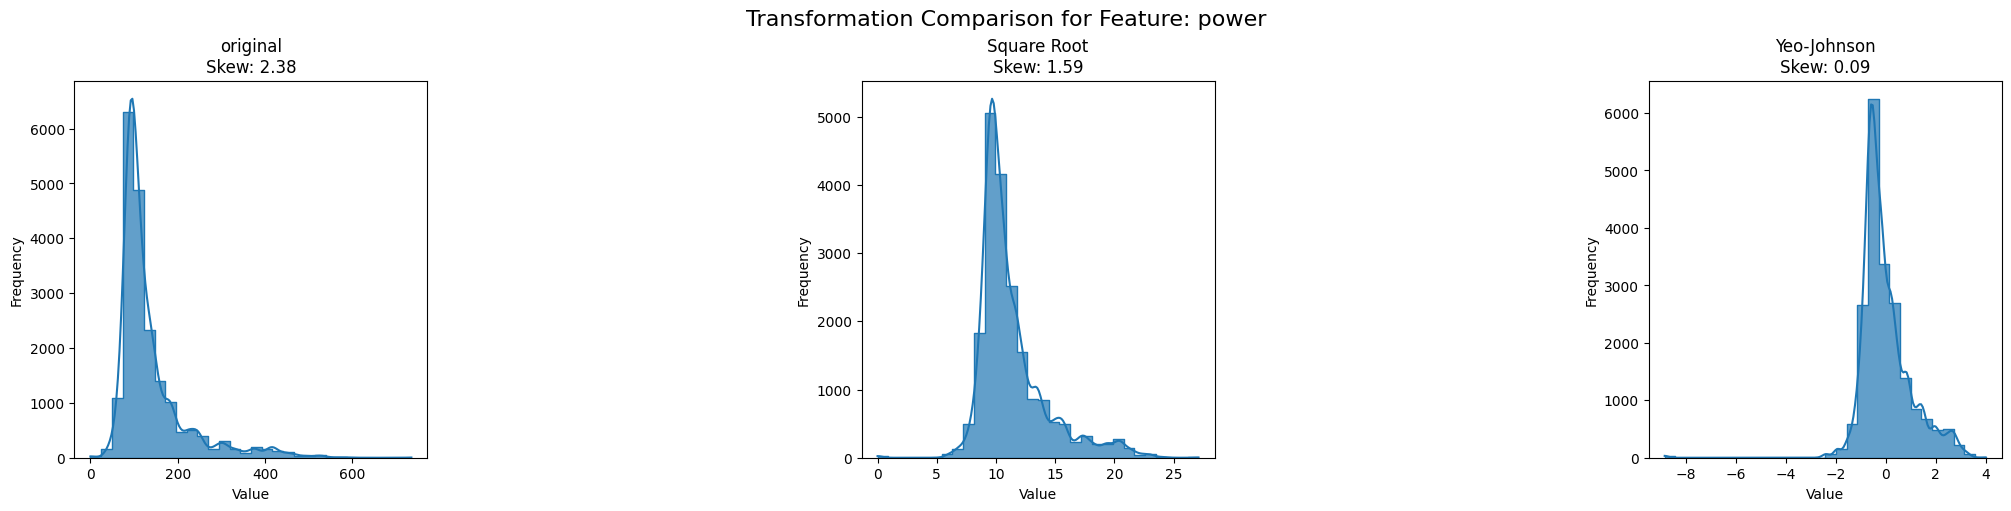

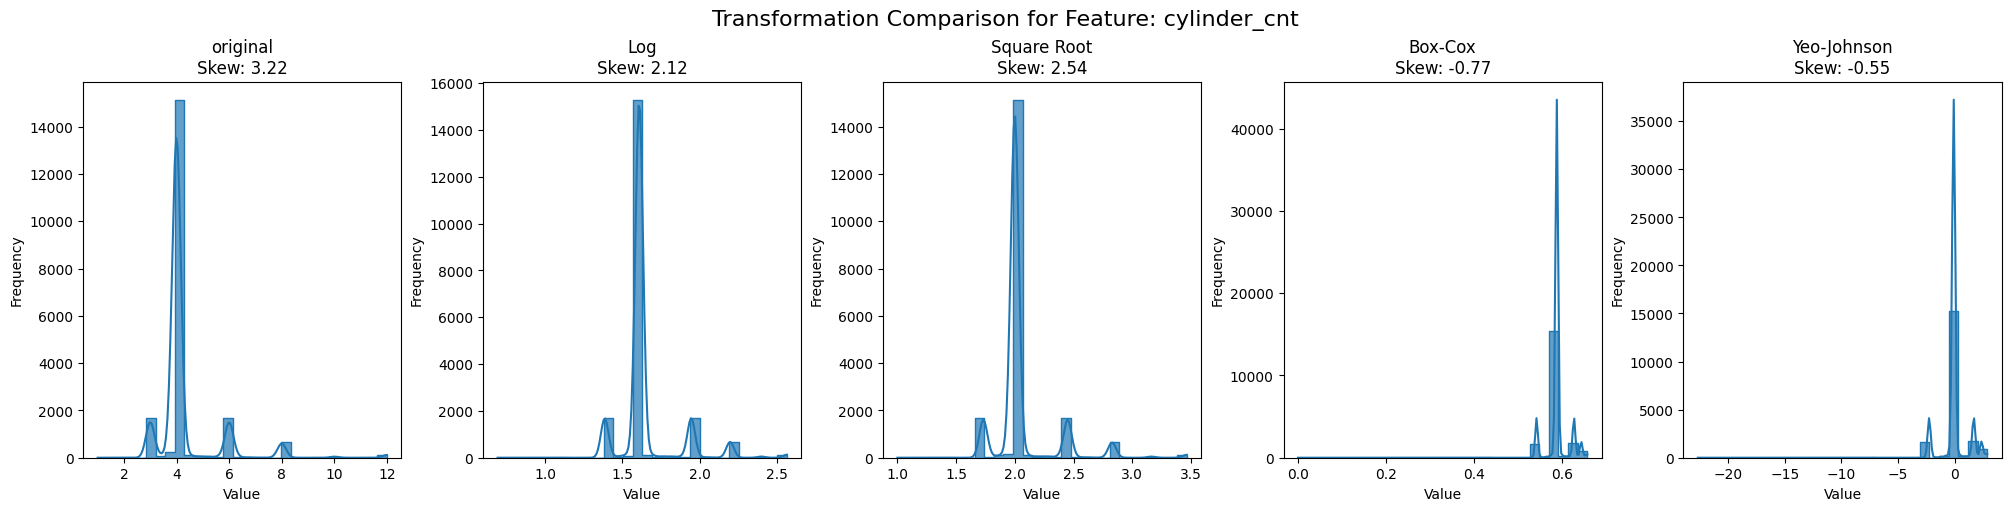

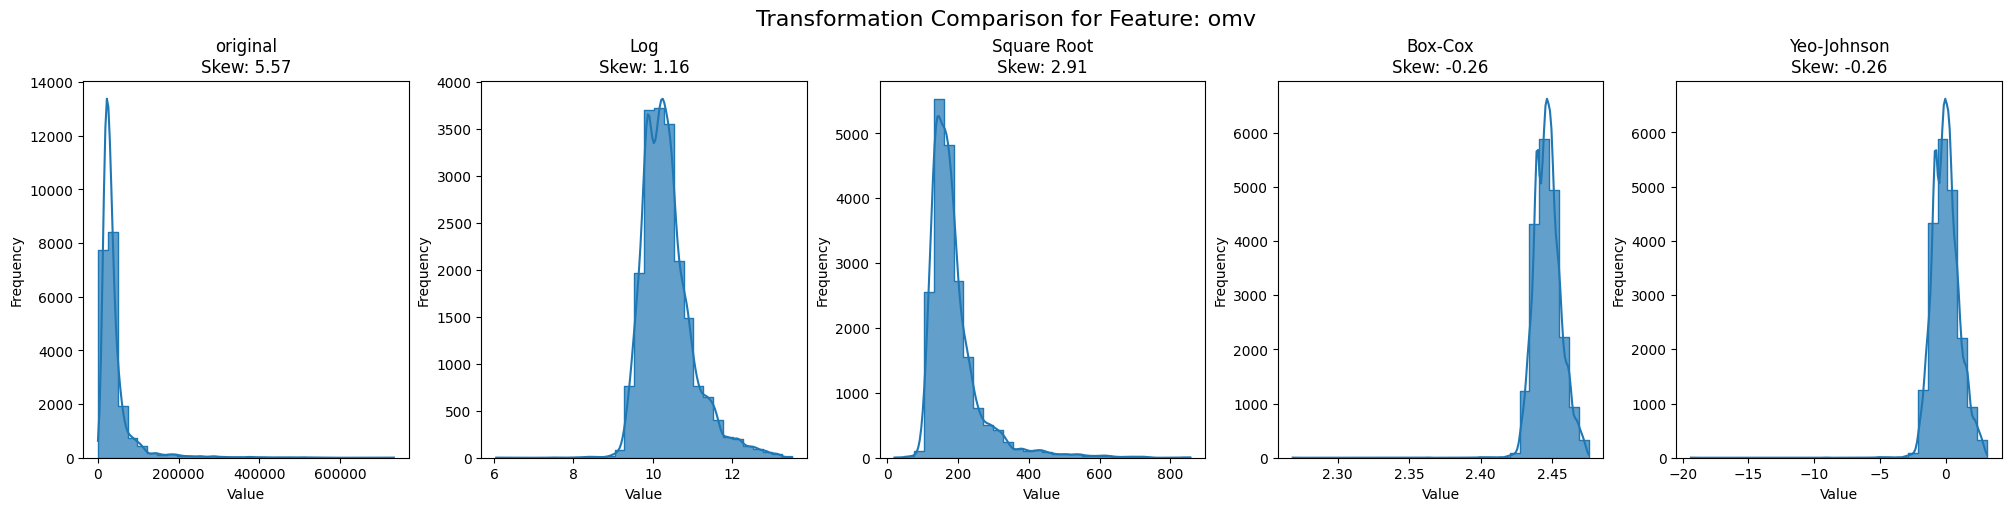

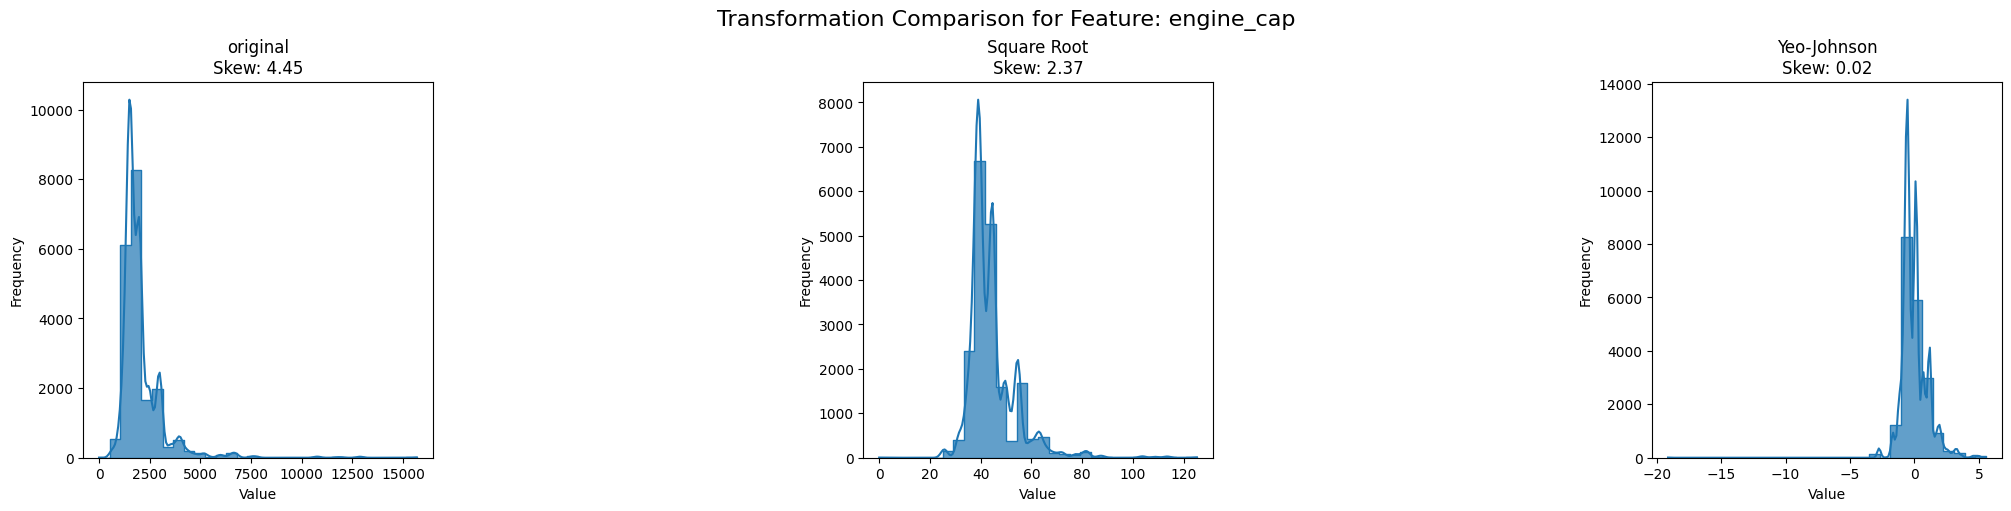

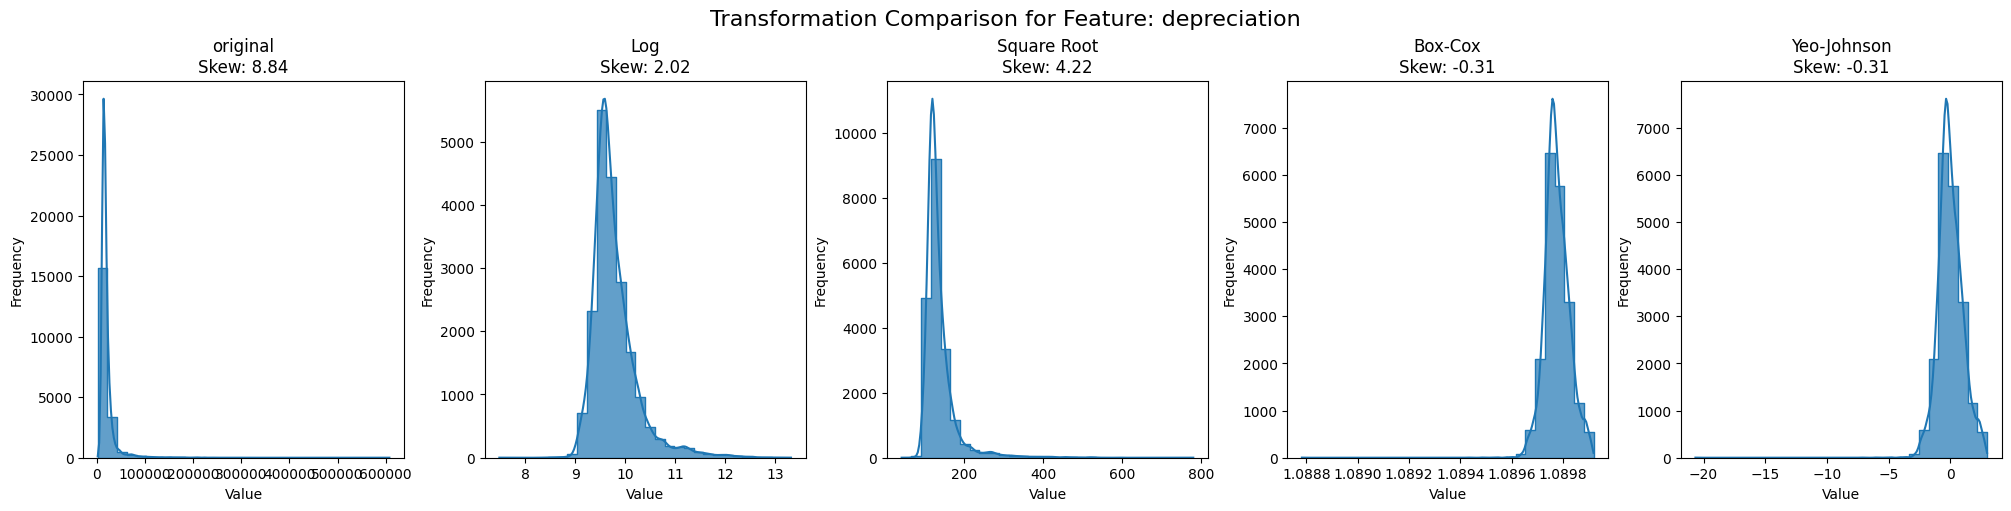

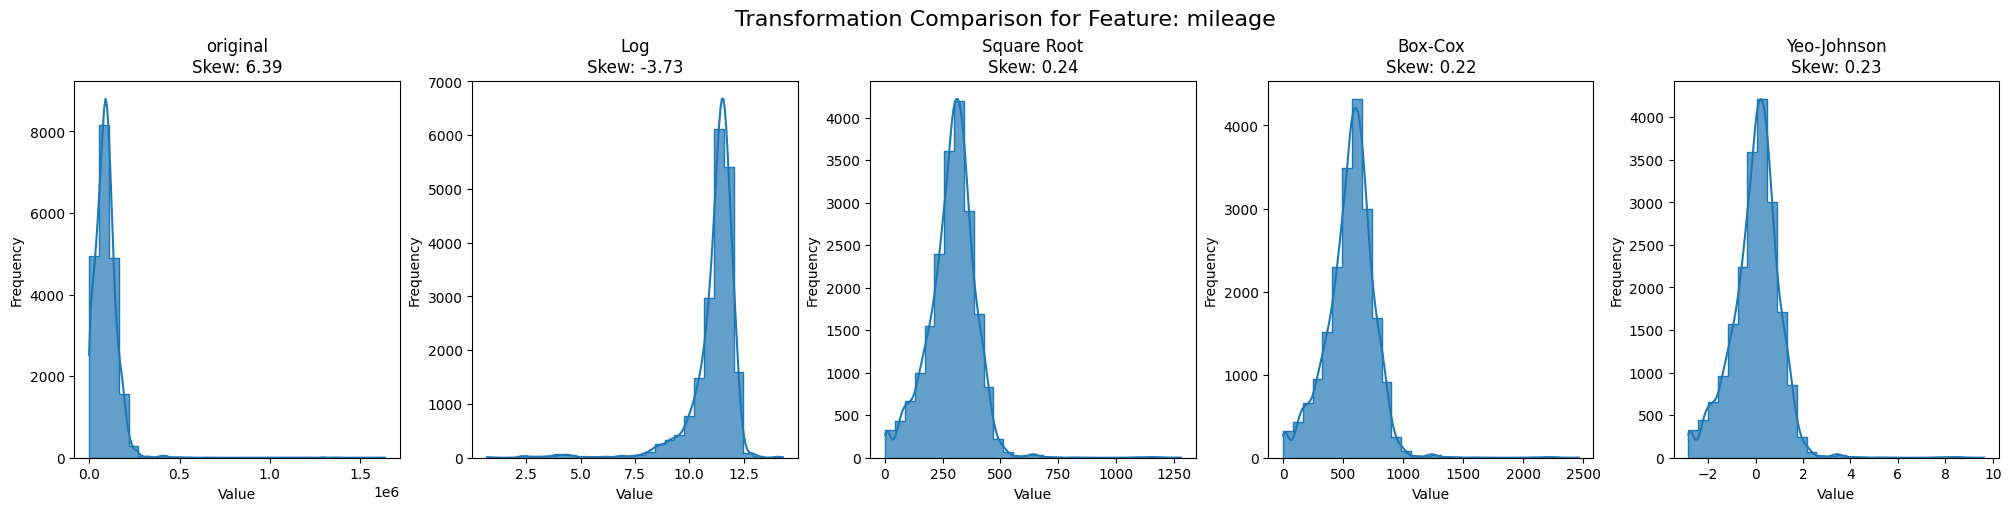

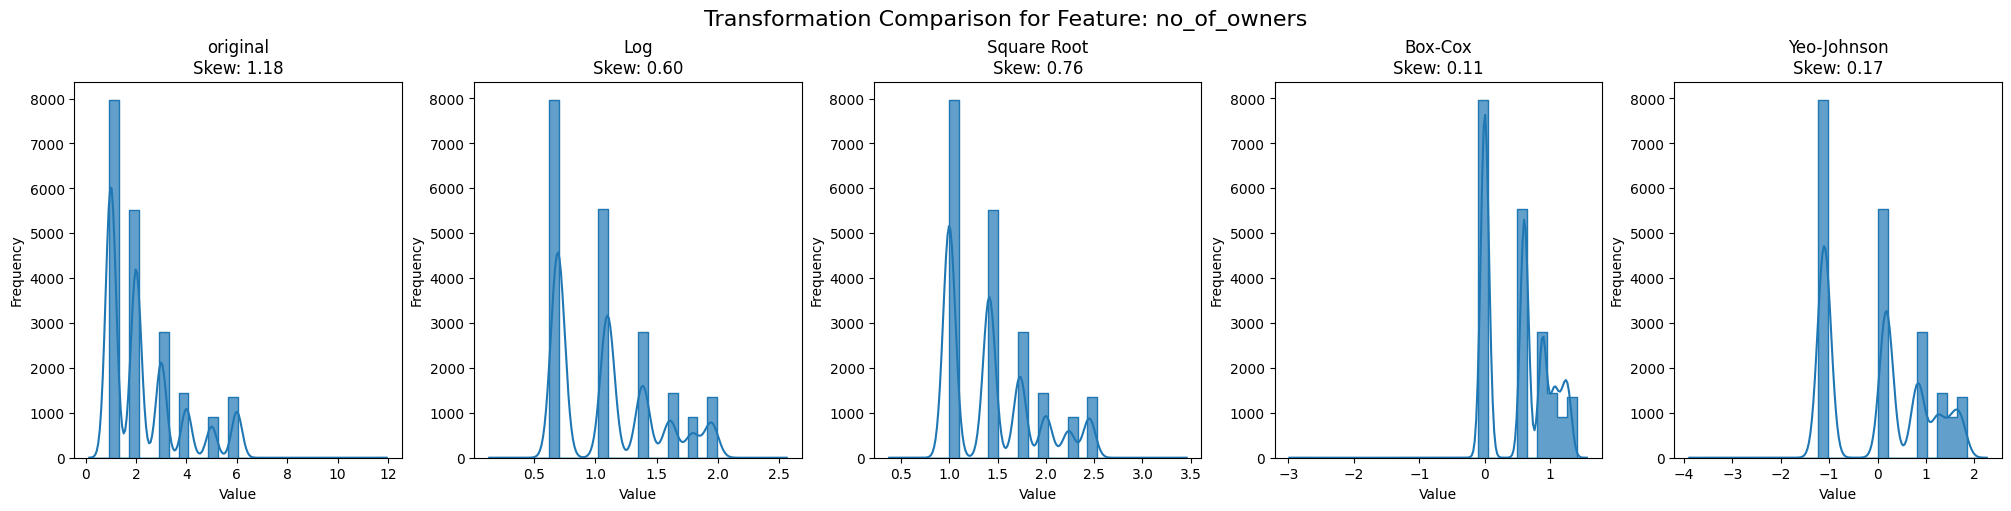

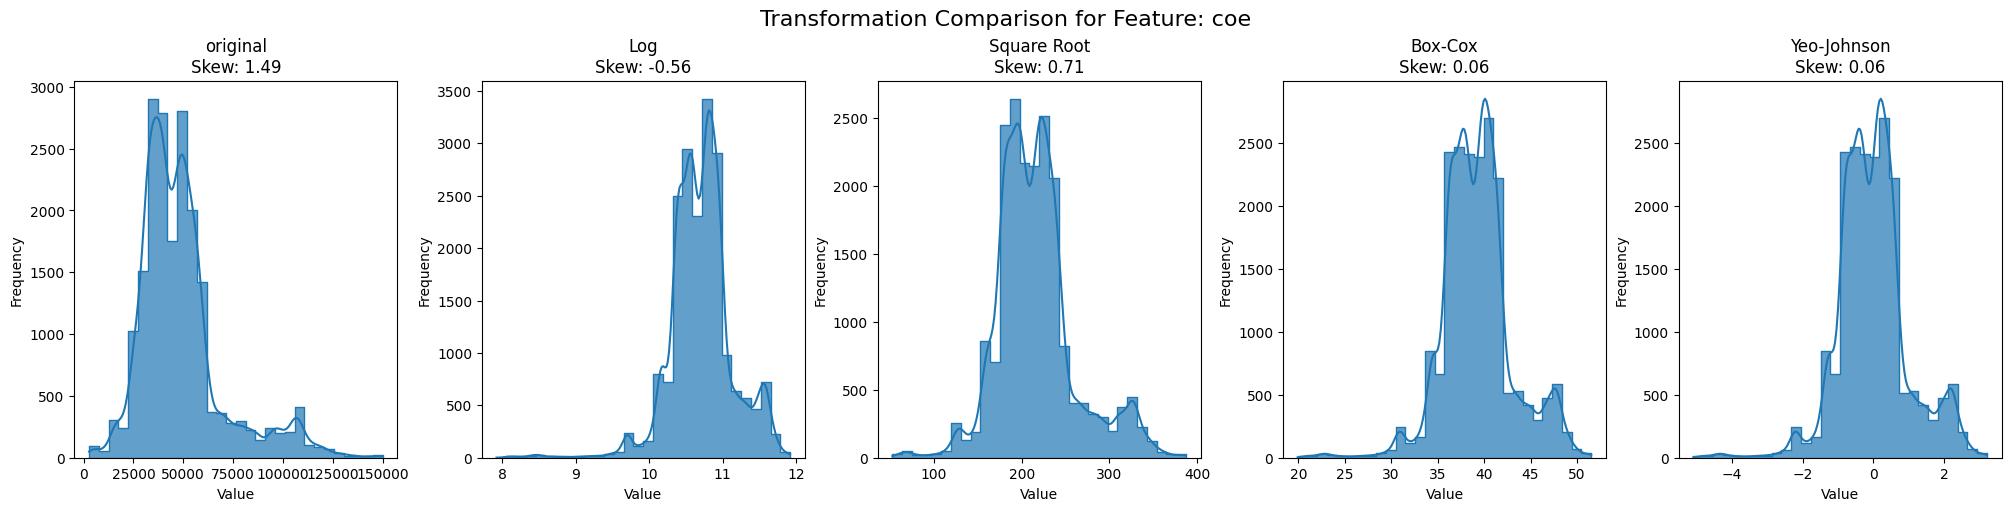

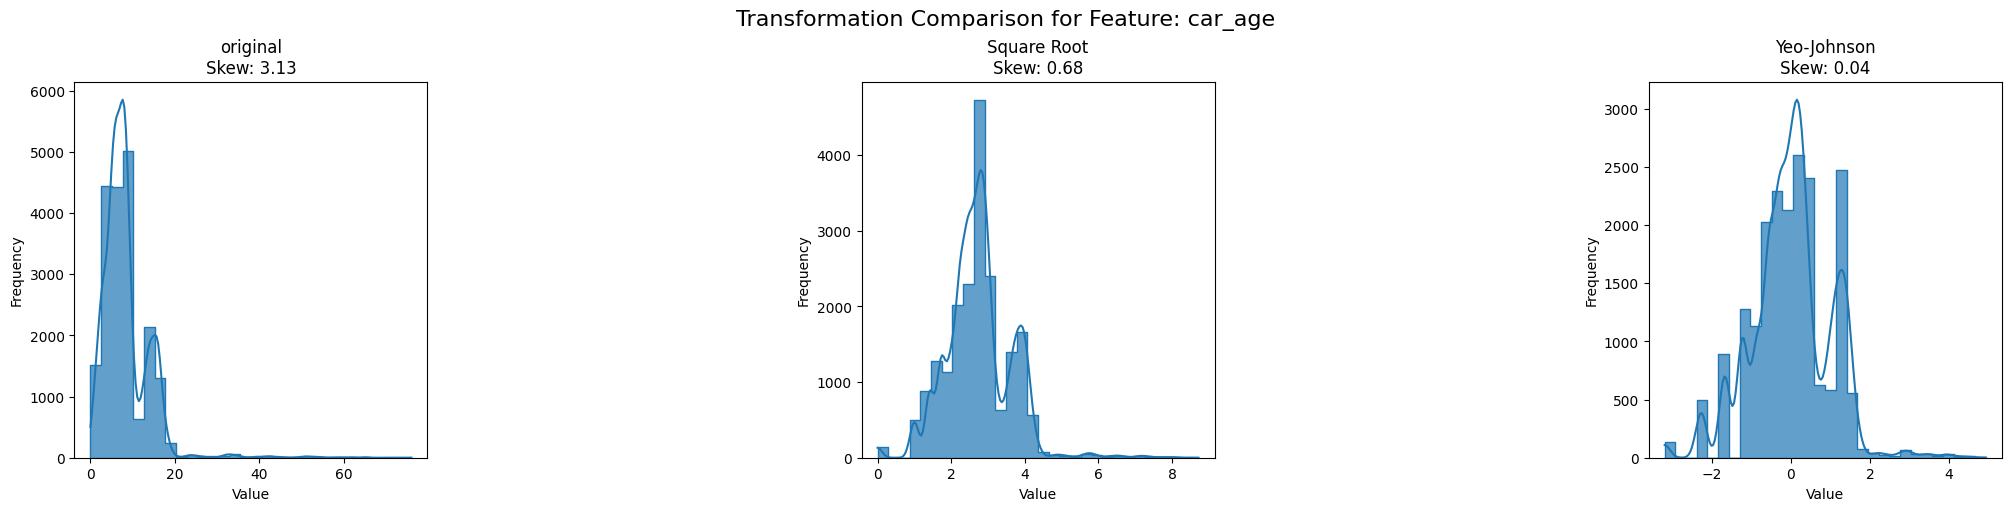

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_morestats.py:1121: UserWarning:

The optimal lambda is 171.201359159191, but the returned lambda is theconstrained optimum to ensure that the maximum or the minimum of the transformed data does not cause overflow in float64.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:176: RuntimeWarning:

overflow encountered in multiply

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:187: RuntimeWarning:

overflow encountered in reduce

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:49: RuntimeWarning:

overflow encountered in reduce



ValueError: array must not contain infs or NaNs

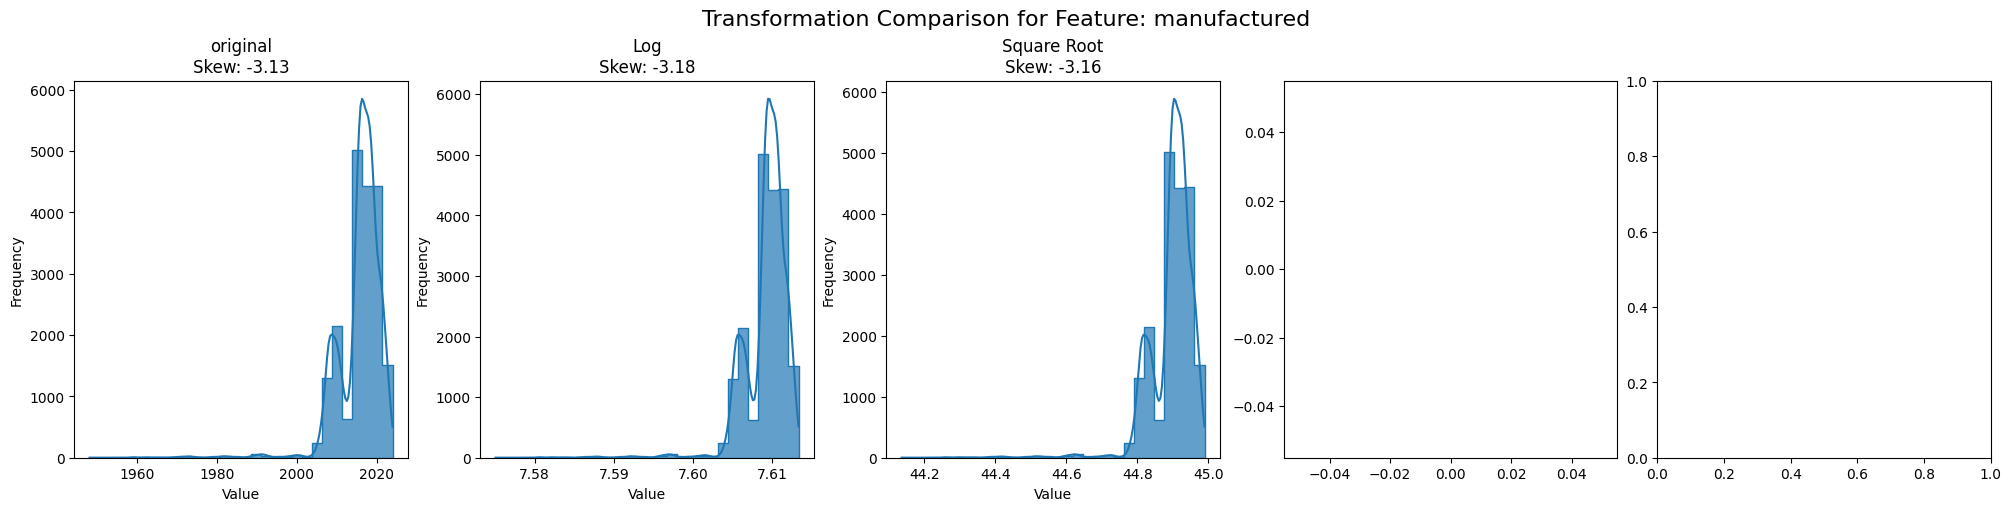

In [68]:
num_cols = 5  # Number of columns for subplots
features = ['curb_weight', 'power', 'cylinder_cnt', 'omv', 'engine_cap', 'depreciation', 'mileage', 'no_of_owners', 'coe', 'car_age', 'manufactured']

for feature in features:
    transformations = {}
    transformations.update(apply_transformations(train_df[feature]))
    
    # Prepare plots
    fig, axes = plt.subplots(1, num_cols, figsize=(20, 5), constrained_layout=True)
    fig.suptitle(f'Transformation Comparison for Feature: {feature}', fontsize=16)

    for idx, (transform_name, transformed_values) in enumerate(transformations.items()):
        ax = axes[idx]
        if transformed_values is not None:
            plot_data = pd.DataFrame({
                feature: transformed_values
            })
            
            ax = axes[idx]
            sns.histplot(data=plot_data, x=feature, bins=30, kde=True,
                         element='step', ax=ax, alpha=0.7)
            # Calculate skewness
            skew_val = skew(transformed_values)
            ax.set_title(f'{transform_name}\nSkew: {skew_val:.2f}', fontsize=12)
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')
        else:
            ax.set_visible(False)
            ax.set_title(f'{transform_name} (Not Applicable)', fontsize=12)

    plt.show()

# Superceeded

## All KNN imputers are put at the back

### ARF

In [43]:
# Select features relevant for imputation
features = ['manufactured', 'reg_date_year', 'omv', 'arf', 'type_of_vehicle_bus/mini bus', 'type_of_vehicle_hatchback',
       'type_of_vehicle_luxury sedan', 'type_of_vehicle_mid-sized sedan',
       'type_of_vehicle_mpv', 'type_of_vehicle_others',
       'type_of_vehicle_sports car', 'type_of_vehicle_stationwagon',
       'type_of_vehicle_suv', 'type_of_vehicle_truck', 'type_of_vehicle_van']

display(f' Before imputation : {train_df["arf"].isna().sum()}')
arf_knn_imputer = GenericKNNImputer(feature=features, neighbours=5, imputed_feature="arf")

train_df['arf'] = arf_knn_imputer.fit_transform(train_df)
val_df['arf'] = arf_knn_imputer.transform(val_df)
test_df['arf'] = arf_knn_imputer.transform(test_df)

display(f' After imputation : {train_df["arf"].isna().sum()}')

' Before imputation : 141'

' After imputation : 0'

### Dereg Value

In [44]:
# Select features relevant for imputation
features = ['coe_age_left', 'coe', 'dereg_value']

display(f' Before imputation : {train_df["dereg_value"].isna().sum()}')
dereg_value_knn_imputer = GenericKNNImputer(feature=features, neighbours=5, imputed_feature="dereg_value")

train_df['dereg_value'] = dereg_value_knn_imputer.fit_transform(train_df)
val_df['dereg_value'] = dereg_value_knn_imputer.transform(val_df)
test_df['dereg_value'] = dereg_value_knn_imputer.transform(test_df)

display(f' After imputation : {train_df["dereg_value"].isna().sum()}')

' Before imputation : 185'

' After imputation : 0'

### Road Tax

In [45]:
features = ['manufactured',"power", "car_age","engine_cap",'reg_date_year', 'omv', 'arf', "road_tax",
'type_of_vehicle_bus/mini bus', 'type_of_vehicle_hatchback', 'type_of_vehicle_luxury sedan',
 'type_of_vehicle_mid-sized sedan','type_of_vehicle_mpv', 
       'type_of_vehicle_sports car', 'type_of_vehicle_stationwagon',
       'type_of_vehicle_suv', 'type_of_vehicle_truck', 'type_of_vehicle_van']

display(f' Before imputation : {train_df["road_tax"].isna().sum()}')
road_tax_knn_imputer = GenericKNNImputer(feature=features, neighbours=5, imputed_feature="road_tax")

train_df['road_tax'] = road_tax_knn_imputer.fit_transform(train_df)
val_df['road_tax'] = road_tax_knn_imputer.transform(val_df)
test_df['road_tax'] = road_tax_knn_imputer.transform(test_df)

display(f' After imputation : {train_df["road_tax"].isna().sum()}')

' Before imputation : 2098'

' After imputation : 0'

In [141]:
## Saving dataset
train_df.to_csv("./dataset/train_data_cleaned.csv", index=False)
val_df.to_csv("./dataset/val_data_cleaned.csv", index=False)
test_df.to_csv("./dataset/test_data_cleaned.csv", index=False)

### features 

## Training models

In [46]:
# display(HTML(train_df.head(50).to_html()))
# 'dereg_value', 'car_age', 'depreciation', 'arf','coe', 'road_tax',
features = ['curb_weight', 'power', 'cylinder_cnt', 'omv', 'dereg_value', 'car_age', 'depreciation', 'arf','coe', 'road_tax',
       'engine_cap', 'depreciation', 'mileage', 'no_of_owners','type_of_vehicle_bus/mini bus', 'type_of_vehicle_hatchback',
       'type_of_vehicle_luxury sedan', 'type_of_vehicle_mid-sized sedan',
       'type_of_vehicle_mpv', 'type_of_vehicle_others',
       'type_of_vehicle_sports car', 'type_of_vehicle_stationwagon',
       'type_of_vehicle_suv', 'type_of_vehicle_truck', 'type_of_vehicle_van']

train_df[features].isna().sum()

curb_weight                        0
power                              0
cylinder_cnt                       0
omv                                0
dereg_value                        0
car_age                            0
depreciation                       0
arf                                0
coe                                0
road_tax                           0
engine_cap                         0
depreciation                       0
mileage                            0
no_of_owners                       0
type_of_vehicle_bus/mini bus       0
type_of_vehicle_hatchback          0
type_of_vehicle_luxury sedan       0
type_of_vehicle_mid-sized sedan    0
type_of_vehicle_mpv                0
type_of_vehicle_others             0
type_of_vehicle_sports car         0
type_of_vehicle_stationwagon       0
type_of_vehicle_suv                0
type_of_vehicle_truck              0
type_of_vehicle_van                0
dtype: int64

In [47]:
# Scale dataset
scaler = MinMaxScaler()
imputer = SimpleImputer(strategy='median')

imputer.fit(train_df[features])

# Split data into training and test sets
train_df[features] = imputer.transform(train_df[features])
val_df[features] = imputer.transform(val_df[features])
test_df[features] = imputer.transform(test_df[features])

# Fit and transform the numerical columns
train_df[features] = scaler.fit_transform(train_df[features])
val_df[features] = scaler.transform(val_df[features])
test_df[features] = scaler.transform(test_df[features])

In [48]:
X_train = train_df[features]
y_train = train_df['price']

X_val = val_df[features]
y_val = val_df['price']

In [51]:
# 2. Initialize the Regression class
regressor = Regression()

# 3. Define parameters for hyperparameter tuning
params = {
    'n_estimators': np.arange(50,350,50),
    'max_depth': np.arange(2,10,2),
    'min_samples_split': np.arange(10 ,60,10),
}


# Example for Random Forest with accuracy scoring and KFold validation
tuner, best_params, tuner_results = regressor.hyperparameter_tuning(
    df_tuple=(X_train, y_train),   # The training data (X, y)
    score_metric='neg_root_mean_squared_error',       # Scoring metric
    kfold_type='kfold',            # Type of fold (KFold used here)
    n_splits=3,                    # Number of splits for KFold
    params=params,                 # Hyperparameter grid to search
    model_name='random_forest'      # Model to use (Random Forest in this case)
)

# 4. View the best hyperparameters and fit the model
print(f"Best Parameters: {best_params}")

# 5. Use the best model to predict on the test set
best_model = tuner.best_estimator_


Model Tuning Starttime :: 2024-11-08 23:09:20.059051
Model Tuning Completed :: 2024-11-08 23:19:24.799958
Best Parameters: {'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 250}


In [52]:
# Save model 
model_name = "random_forest_with_all_imputes"
save_path = f"./model_assets"

# Save the trained model
joblib.dump(best_model, f"{save_path}/{model_name}.joblib")

['./model_assets/random_forest_with_all_imputes.joblib']

INFO [_infer_type] :: Type changed
INFO [_infer_type] :: Type changed
INFO [_infer_type] :: Type changed
INFO [_infer_type] :: Type changed


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



{'Train RMSE ::': '21228.', 'Train MAE': '11285.', 'Train PMAE': '17.635', 'Train PME ': '-8.811', 'Train R2': '0.982', 'Train Adj R2': '0.9820248513300612', 'Train Predicted R2': '0.9812754489960462'} {'Valid RMSE ::': '33328.', 'Valid MAE': '12915.', 'Valid PMAE': '19.668', 'Valid PME ': '-10.33', 'Valid R2': '0.946', 'Valid Adj R2': '0.9458047064908984', 'Valid Predicted R2': '0.9422961963761809'}


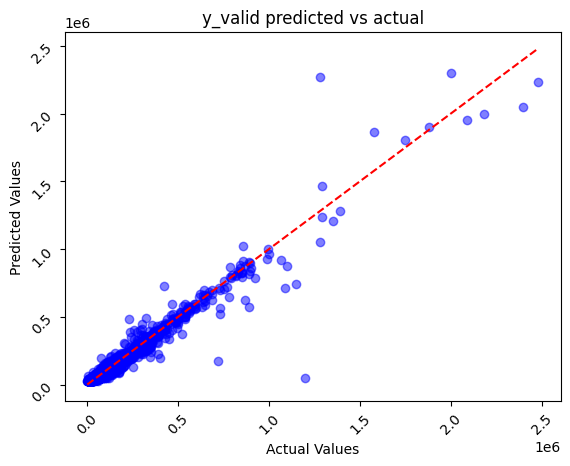

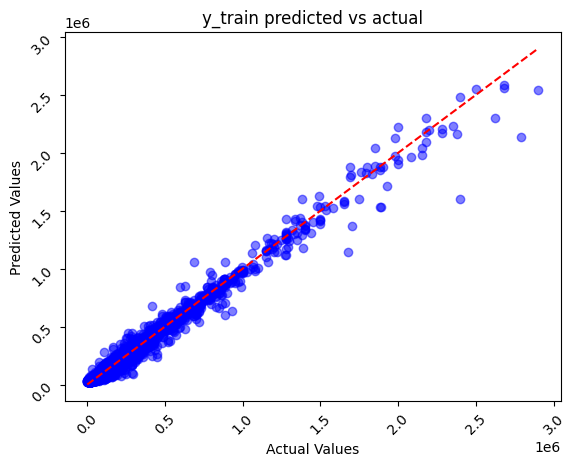

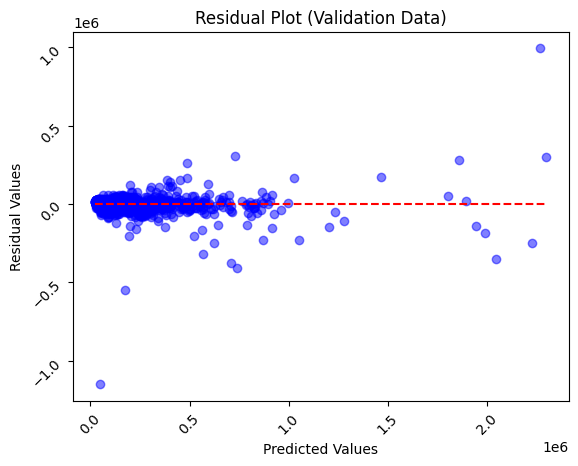

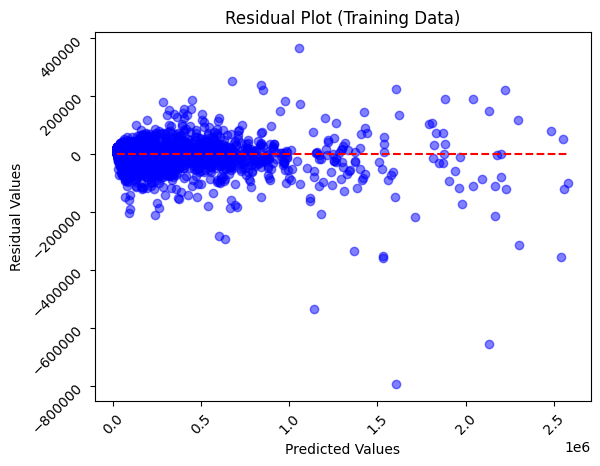

In [53]:
model_name = "random_forest_with_all_imputes"
save_path = f"./model_assets"

model = joblib.load(f"{save_path}/{model_name}.joblib")
reg_evaluate = RegressionEvaluate(model_weight_path= save_path)
reg_evaluate.mini_reg_evaluate(df_train_tuple=(X_train, y_train),
                            df_valid_tuple=( X_val,y_val),model_name=model_name, save_path=save_path)

feature_impt 25
 features 25


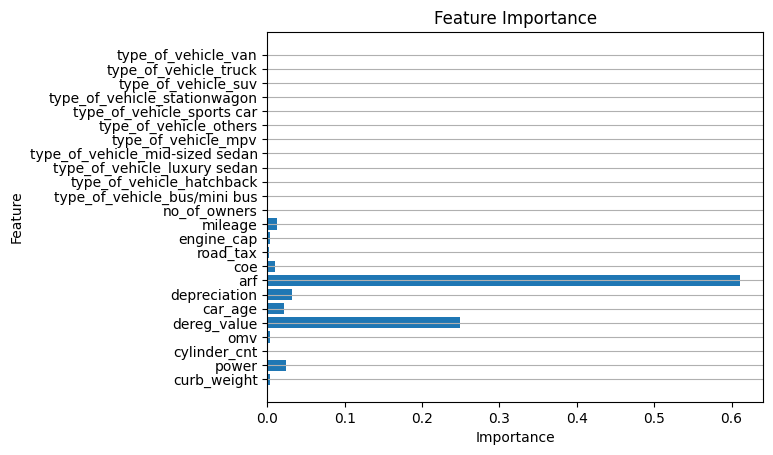

In [25]:
model_name = "random_forest_v4"
save_path = f"./model_assets"

reg_evaluate = RegressionEvaluate(model_weight_path= save_path)
reg_evaluate._plot_feature_immportance(model_name, features)

INFO [_infer_type] :: Type changed
INFO [_infer_type] :: Type changed
INFO [_infer_type] :: Type changed
INFO [_infer_type] :: Type changed


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



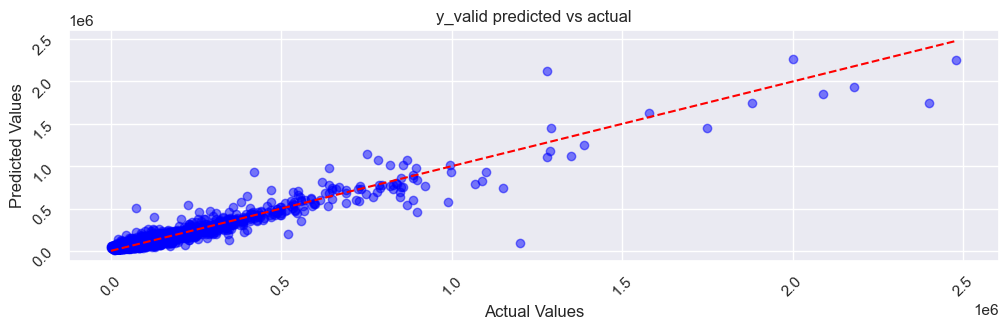

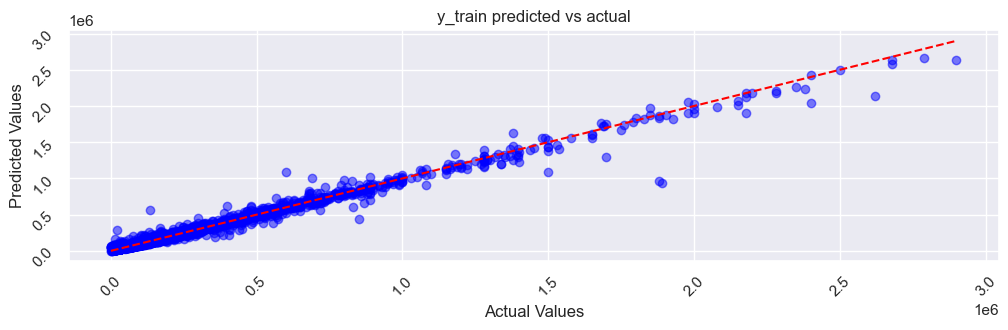

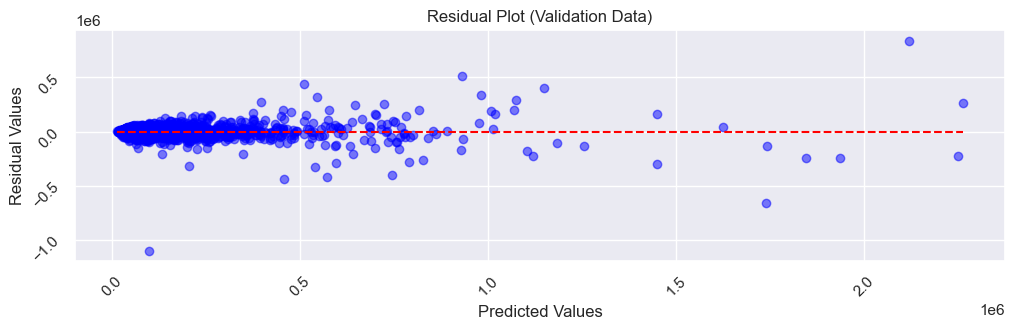

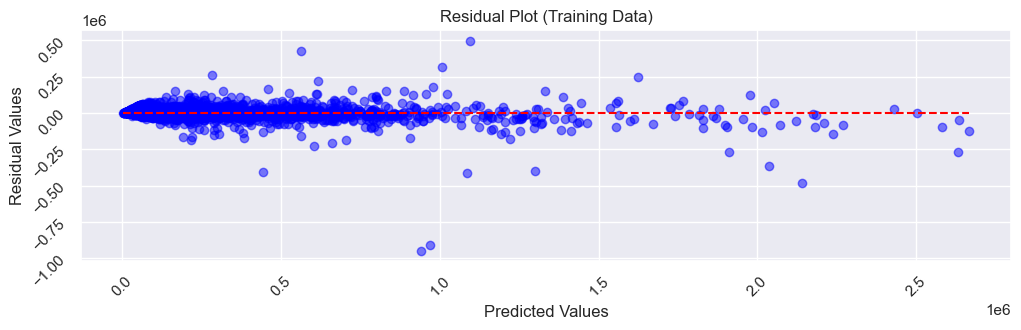

In [81]:
model_name = "random_forest_v3"
save_path = f"./model_assets"

reg_evaluate.mini_reg_evaluate(df_train_tuple=(X_train, y_train),
df_valid_tuple=( X_val,y_val),model_name=model_name, save_path=save_path)

In [89]:
## Retrain the model
# Train + Valid (Retrain on the whole model)
# best params
# all data

all_x = pd.concat([train_df[features],val_df[features]])
all_y = pd.concat([train_df["price"],val_df["price"]])
final_model = tuner.fit(X_train, y_train)


In [92]:
final_model.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_split=10, n_estimators=150)

In [93]:
model = joblib.load(f"{save_path}/{model_name}.joblib")
X_test = _infer_type(test_df[features])
y_test_pred = final_model.predict(X_test)
submission = pd.DataFrame(y_test_pred).reset_index().rename(columns={"index":"Id", 0:"Predicted"})
submission.to_csv(f"submission/submission_{model_name}_.csv")

INFO [_infer_type] :: Type changed


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

